XGBoost SHAP - Bar


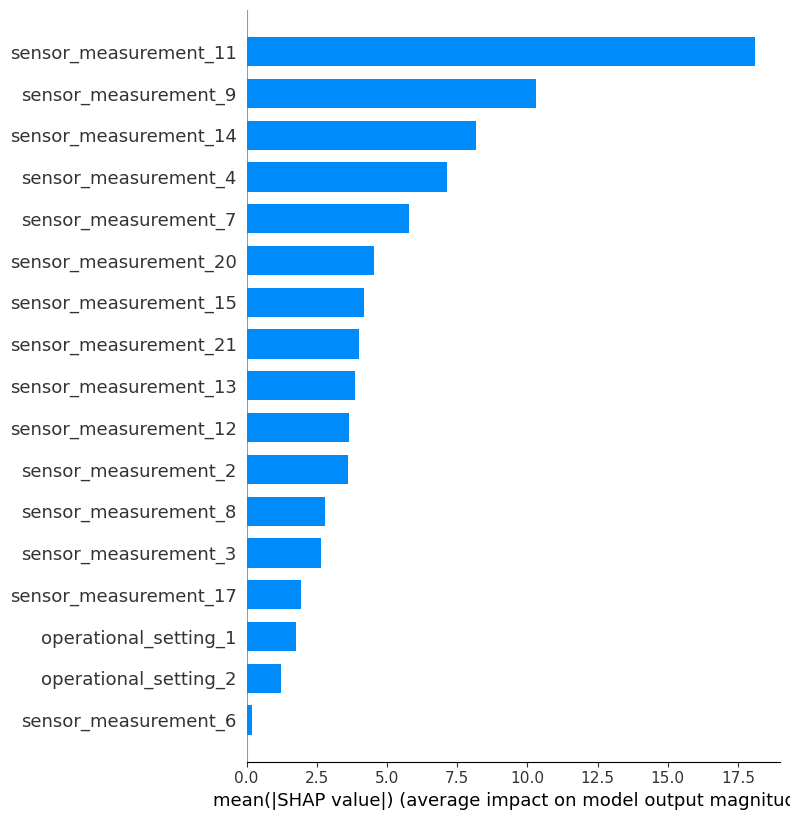

XGBoost SHAP - Beeswarm


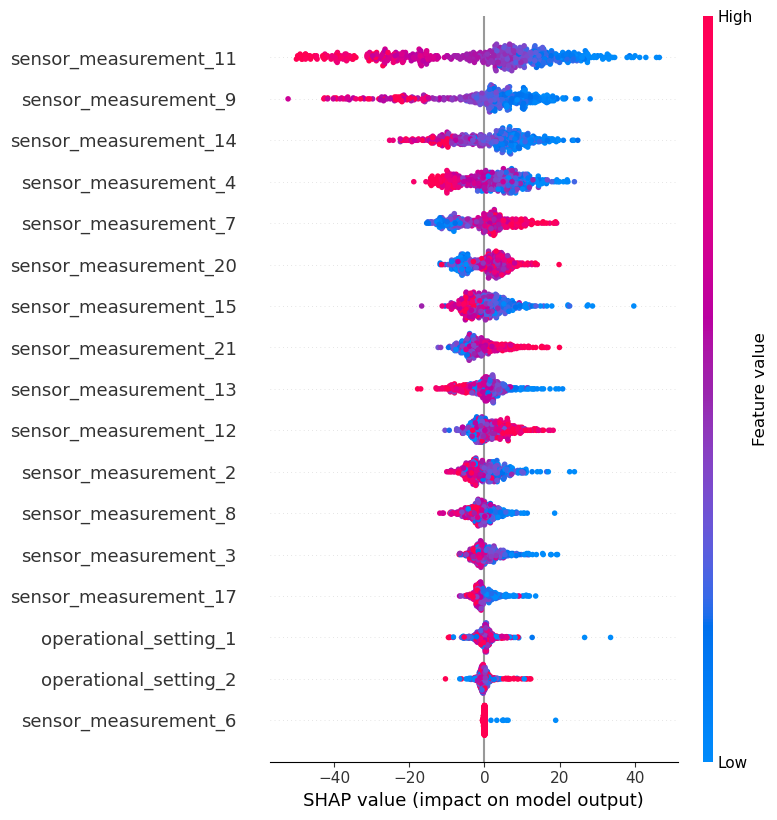

Random Forest SHAP - Bar


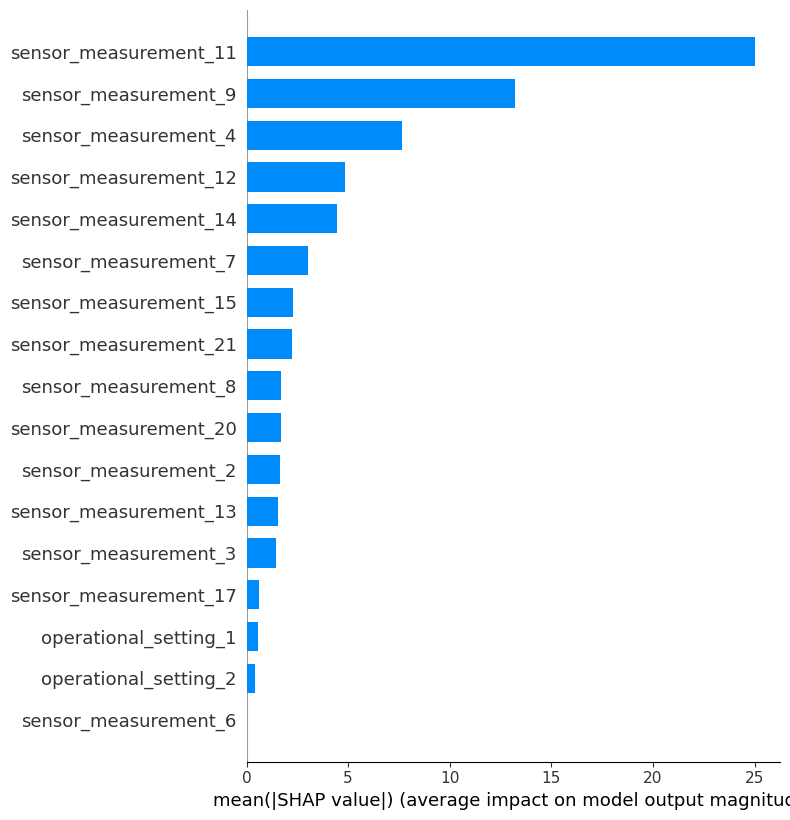

Random Forest SHAP - Beeswarm


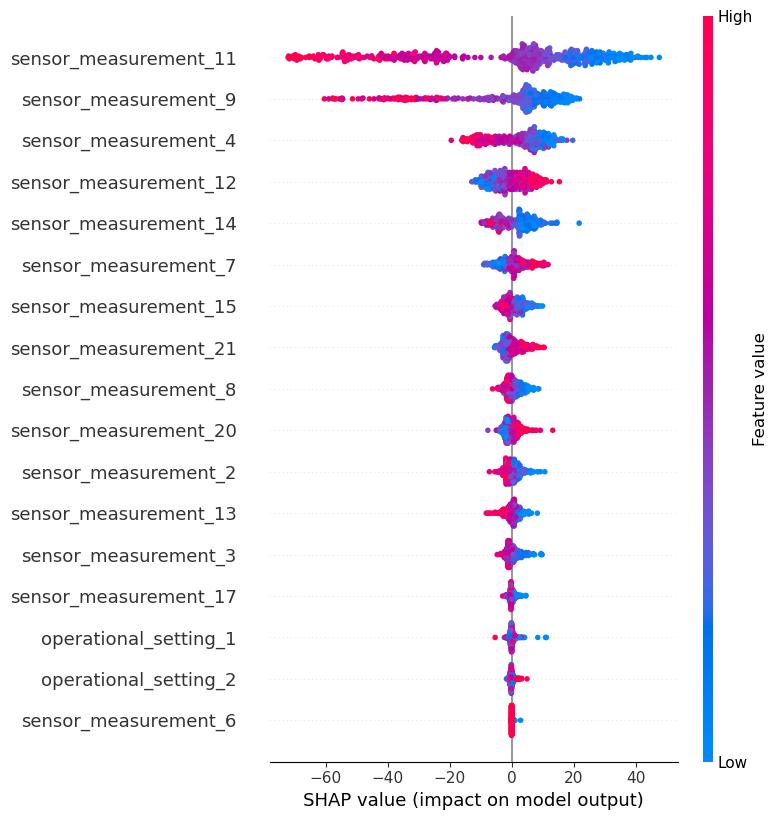

                         XGBoost  Random Forest
sensor_measurement_11  18.094463      25.000927
sensor_measurement_12   3.644649       4.844340
sensor_measurement_13   3.876230            NaN
sensor_measurement_14   8.169783       4.442096
sensor_measurement_15   4.190652       2.283258
sensor_measurement_20   4.524288       1.675674
sensor_measurement_21   4.005705       2.251010
sensor_measurement_4    7.134286       7.657933
sensor_measurement_7    5.797628       3.022612
sensor_measurement_8         NaN       1.704364
sensor_measurement_9   10.309276      13.217386


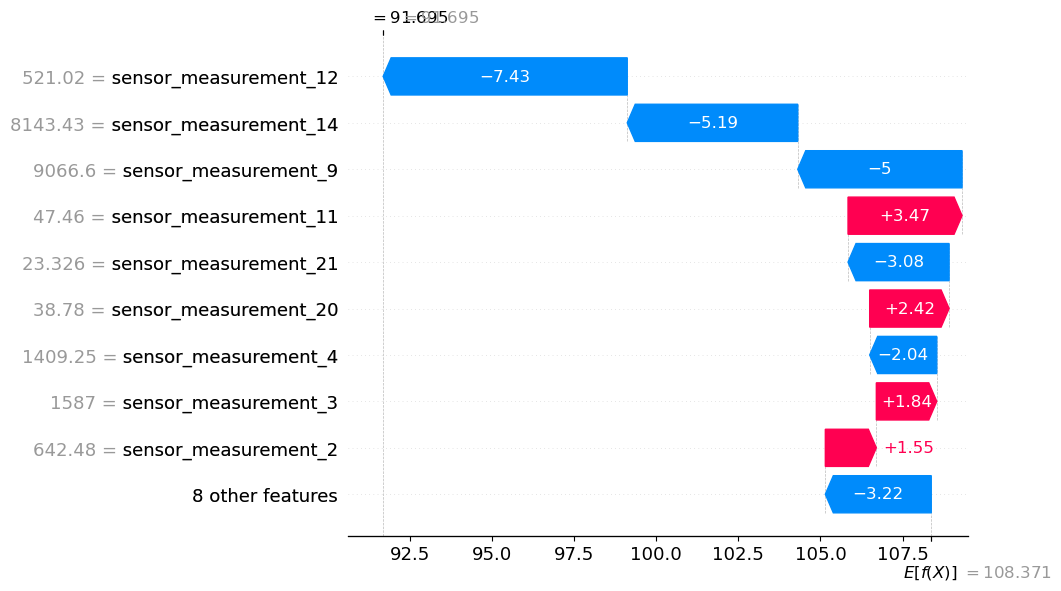

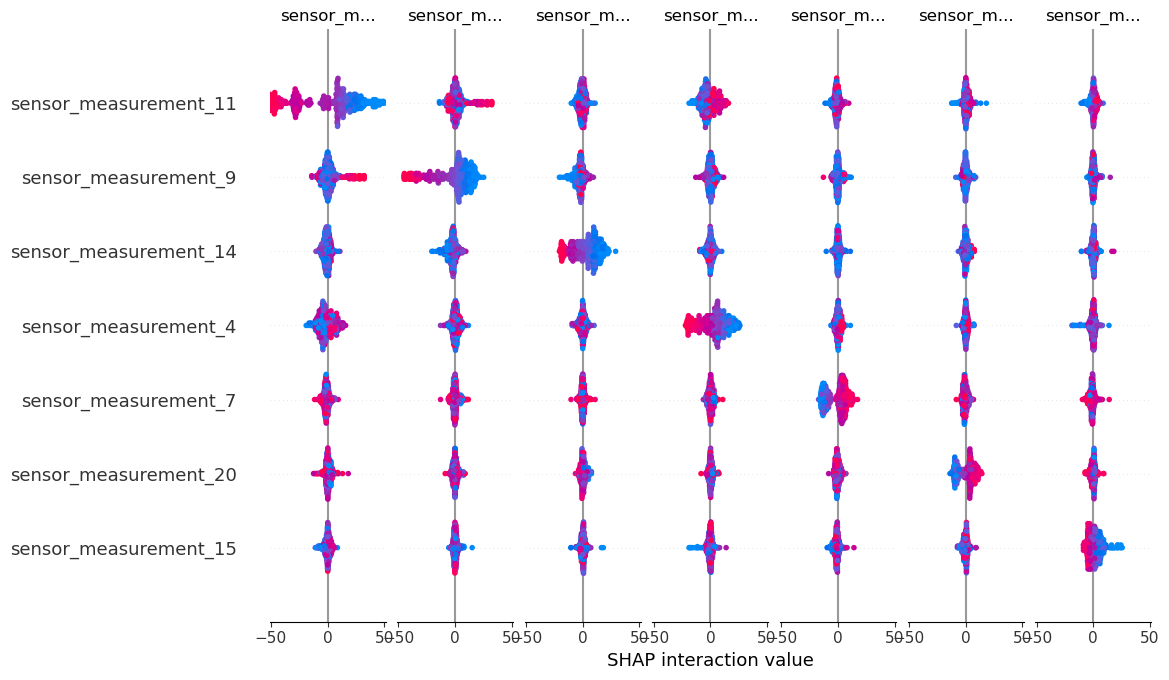

                  Feature  XGB Importance (%)  RF Importance (%)
9   sensor_measurement_11           21.550552          34.570134
8    sensor_measurement_9           12.278374          18.276395
12  sensor_measurement_14            9.730232           6.142326
4    sensor_measurement_4            8.496953          10.589038
6    sensor_measurement_7            6.904990           4.179529
15  sensor_measurement_20            5.388439           2.317045
13  sensor_measurement_15            4.991077           3.157184
16  sensor_measurement_21            4.770805           3.112593
11  sensor_measurement_13            4.616600           2.136489
10  sensor_measurement_12            4.340786           6.698531


In [3]:
# 1. Imports
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
import numpy as np

# 2. Load SHAP values
X_sample, xgb_shap_values, rf_shap_values = joblib.load('C:/Users/ammar/SHAP_ML/models/cmaps_shap_values.pkl')

# 3. Global Explanation - Summary Plots
print("XGBoost SHAP - Bar")
shap.summary_plot(xgb_shap_values, X_sample, plot_type='bar')
plt.show()

print("XGBoost SHAP - Beeswarm")
shap.summary_plot(xgb_shap_values, X_sample)
plt.show()

print("Random Forest SHAP - Bar")
shap.summary_plot(rf_shap_values, X_sample, plot_type='bar')
plt.show()

print("Random Forest SHAP - Beeswarm")
shap.summary_plot(rf_shap_values, X_sample)
plt.show()

# 4. Comparison Table
xgb_importance = pd.Series(np.abs(xgb_shap_values.values).mean(axis=0), index=X_sample.columns).sort_values(ascending=False)
rf_importance = pd.Series(np.abs(rf_shap_values.values).mean(axis=0), index=X_sample.columns).sort_values(ascending=False)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_importance.head(10),
    'Random Forest': rf_importance.head(10)
})
print(comparison_df)

# Save SHAP values and features
X_sample.to_csv("C:/Users/ammar/SHAP_ML/models/cmaps_X_sample.csv", index=False)
pd.DataFrame(xgb_shap_values.values, columns=X_sample.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/cmaps_xgb_shap.csv", index=False)
pd.DataFrame(rf_shap_values.values, columns=X_sample.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/cmaps_rf_shap.csv", index=False)

# 5. Local Explanation - Waterfall Plot (XGBoost)
i = 0  # Sample index to explain
shap.plots.waterfall(shap.Explanation(
    values=xgb_shap_values.values[i],
    base_values=xgb_shap_values.base_values[i],
    data=X_sample.iloc[i],
    feature_names=X_sample.columns.tolist()
))

# 6. Local Explanation - Force Plot (XGBoost)
shap.initjs()
shap.force_plot(xgb_shap_values.base_values[i], xgb_shap_values.values[i], X_sample.iloc[i])

# 7. Interaction Summary (XGBoost)
xgb = joblib.load('C:/Users/ammar/SHAP_ML/models/cmaps_xgboost.pkl')
interaction_values = shap.TreeExplainer(xgb).shap_interaction_values(X_sample)
shap.summary_plot(interaction_values, X_sample)

# 8. Normalized SHAP Importance
xgb_importance_pct = (np.abs(xgb_shap_values.values).mean(axis=0) / np.abs(xgb_shap_values.values).mean(axis=0).sum()) * 100
rf_importance_pct = (np.abs(rf_shap_values.values).mean(axis=0) / np.abs(rf_shap_values.values).mean(axis=0).sum()) * 100

feature_df = pd.DataFrame({
    "Feature": X_sample.columns,
    "XGB Importance (%)": xgb_importance_pct,
    "RF Importance (%)": rf_importance_pct
}).sort_values("XGB Importance (%)", ascending=False)

print(feature_df.head(10))

XGBoost SHAP - Beeswarm


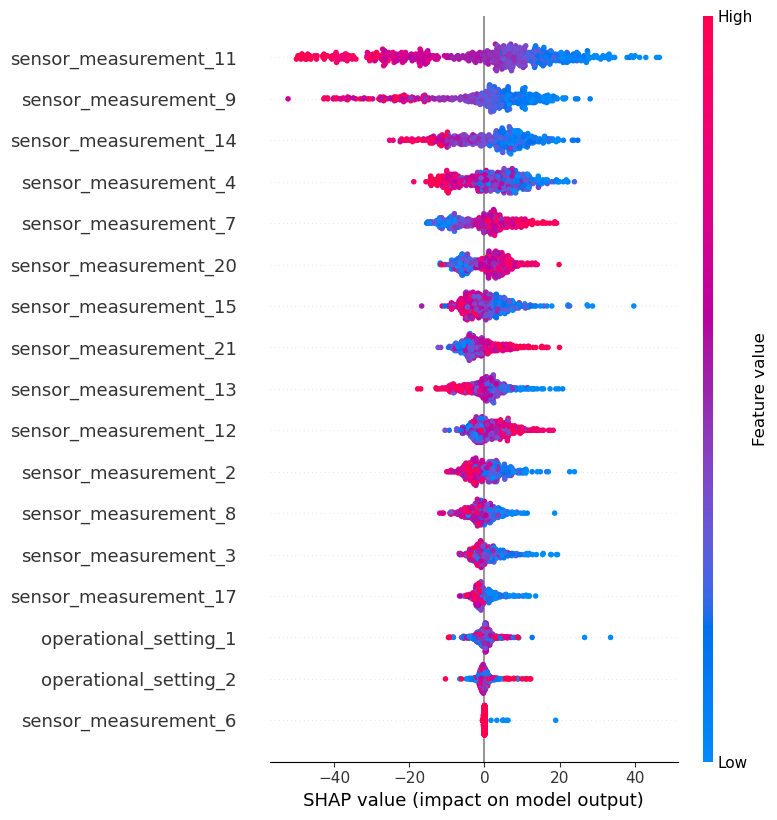

In [10]:
# XGBoost - Beeswarm Plot
print("XGBoost SHAP - Beeswarm")
plt.figure()
shap.summary_plot(xgb_shap_values, X_sample, show=False)
plt.tight_layout()
plt.savefig("C:/Users/ammar/SHAP_ML/visuals/cmaps_xgb_beeswarm.png", dpi=300)
plt.show()

Random Forest SHAP - Beeswarm


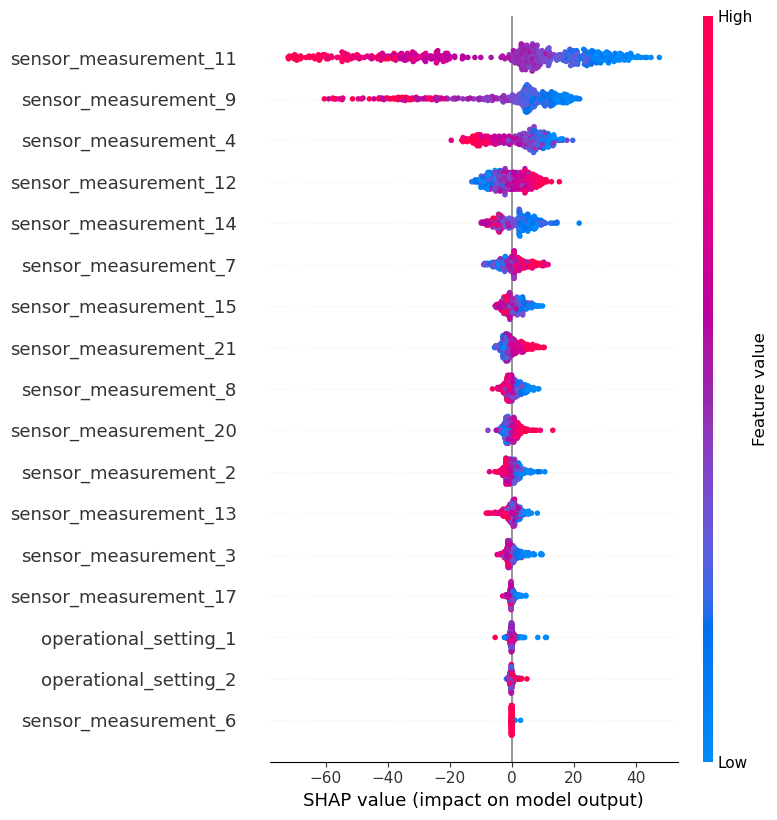

In [11]:
# Random Forest - Beeswarm Plot
print("Random Forest SHAP - Beeswarm")
plt.figure()
shap.summary_plot(rf_shap_values, X_sample, show=False)
plt.tight_layout()
plt.savefig("C:/Users/ammar/SHAP_ML/visuals/cmaps_rf_beeswarm.png", dpi=300)
plt.show()